In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='energy', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,usual,unusual,rare,epic
20,11.0,-54.54,-35.26,-26.37,-13.25,0.0
21,11.0,-57.07,-44.08,-27.76,-11.32,0.0
22,12.0,-56.30,-42.83,-24.78,-12.69,0.0
23,12.0,-53.69,-41.56,-17.71,-10.39,0.0
24,13.0,-55.46,-42.63,-23.36,-13.72,0.0
25,13.0,-52.82,-42.29,-27.63,-12.94,0.0
26,14.0,-54.67,-44.36,-26.62,-15.54,0.0
27,14.0,-52.26,-44.61,-28.95,-15.92,0.0
28,15.0,-55.44,-38.63,-25.85,-12.69,0.0
29,15.0,-56.69,-47.86,-22.75,-13.62,0.0


# TOTAL ENERGY AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_sum

,no_hero,usual,unusual,rare,epic
0,-548.94,-424.11,-251.78,-132.08,0.0


Text(0.5, 1.0, 'Total Energy Spent After 10 Attacks')

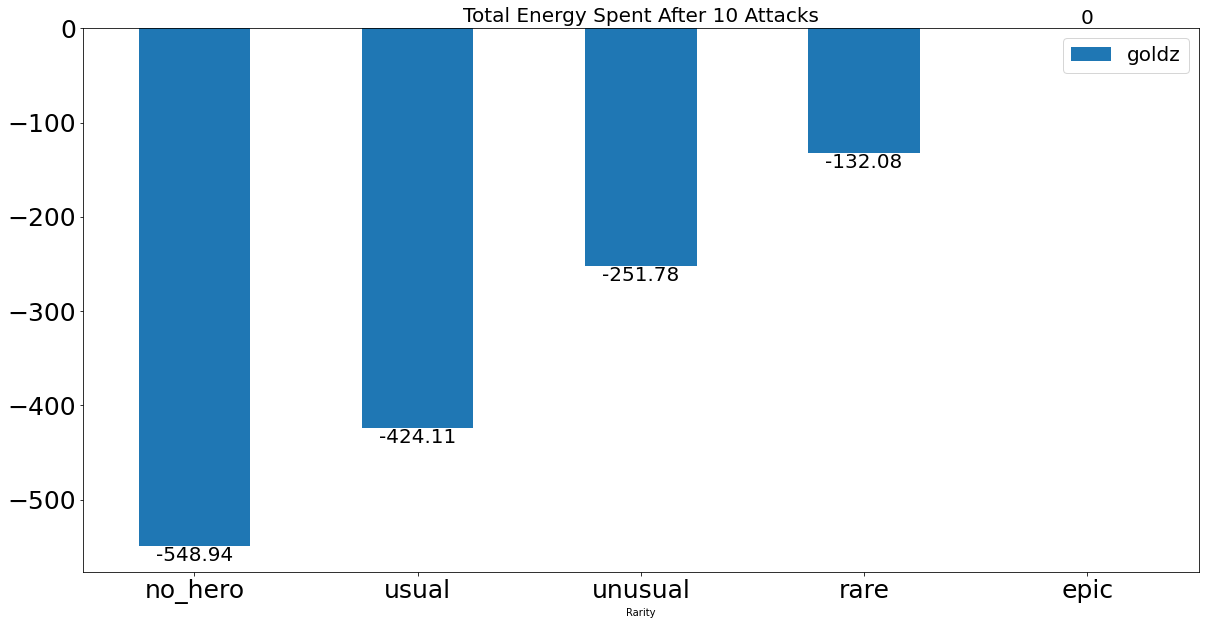

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Energy Spent After 10 Attacks", fontsize=20)

# ENERGY AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_mean

,no_hero,usual,unusual,rare,epic
0,-54.894,-42.411,-25.178,-13.208,0.0


Text(0.5, 1.0, 'Energy Average on Each attack')

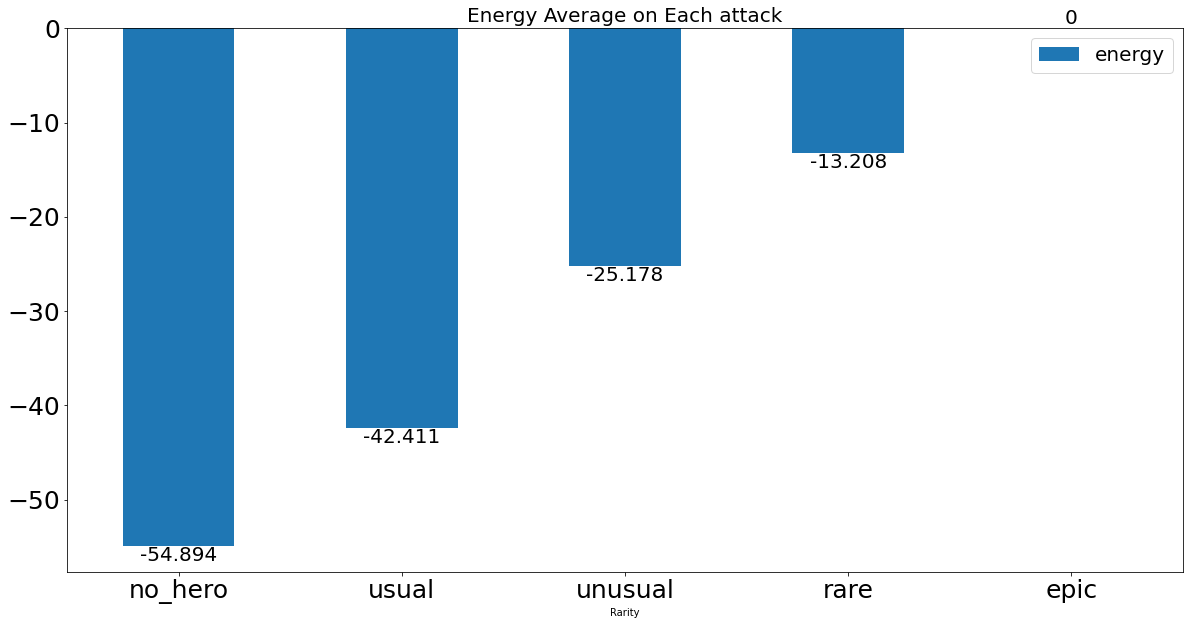

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'energy':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Energy Average on Each attack", fontsize=20)

# ENERGY DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,usual,unusual,rare,epic
20,11.0,19.28,28.17,41.29,54.54
21,11.0,12.99,29.31,45.75,57.07
22,12.0,13.47,31.52,43.61,56.30
23,12.0,12.13,35.98,43.30,53.69
24,13.0,12.83,32.10,41.74,55.46
25,13.0,10.53,25.19,39.88,52.82
26,14.0,10.31,28.05,39.13,54.67
27,14.0,7.65,23.31,36.34,52.26
28,15.0,16.81,29.59,42.75,55.44
29,15.0,8.83,33.94,43.07,56.69


# TOTAL ENERGY SPENT COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_sum

,usual,unusual,rare,epic
0,124.83,297.16,416.86,548.94


Text(0.5, 1.0, 'Total Diff Energy Compared to No Hero')

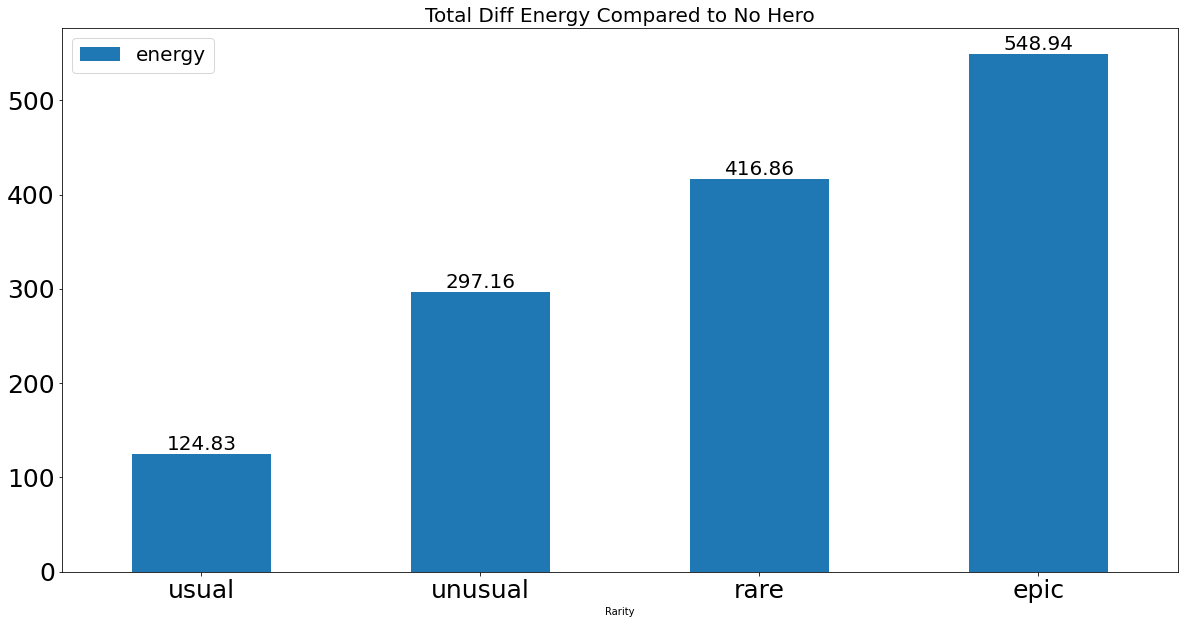

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'energy':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Energy Compared to No Hero", fontsize=20)

# ENERGY DIFFERENCE SPENT PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_mean

,usual,unusual,rare,epic
0,12.483,29.716,41.686,54.894


Text(0.5, 1.0, 'Diff Energy Average per Attack')

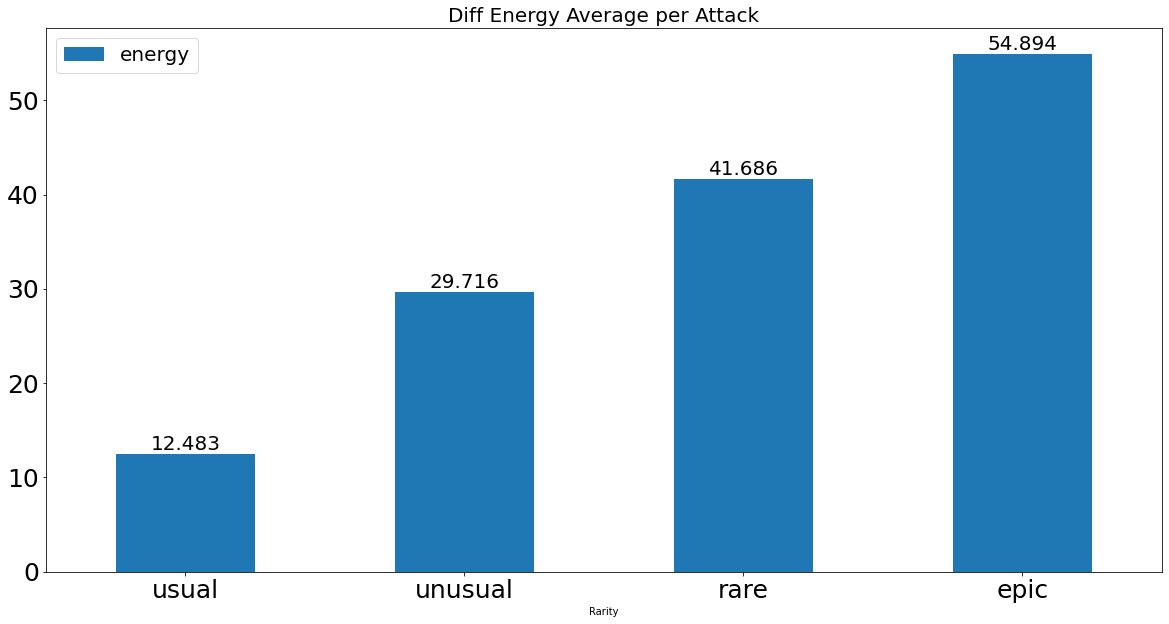

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'energy':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Energy Average per Attack", fontsize=20)